In [956]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pandas import json_normalize
import json
import random

In [957]:
#DATA CLEANING

spotify_1 = pd.read_csv('/Users/amelia/Desktop/Bootcamp/MSDS593DataVis/final/Most Streamed Spotify Songs 2024.csv',encoding='ISO-8859-1', sep = ',')
pd.set_option('display.max_columns', None)
spotify_1.head(10)
# first look at the data. what is the ý character?
# we have 29 variables 
#this is some sort of missing value which we should probably drop
#there are also repeat tracks which we should filter out
#why does spotify playlist count = 1?

# all the odd null value characters are removed
spotify_1 = spotify_1[~spotify_1['Album Name'].str.contains('ý')]
spotify_1['Artist'] = spotify_1['Artist'].str.replace('¿', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ï', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ý', '')


#remove all duplicate titles
spotify_1 = spotify_1.drop_duplicates(subset=['Track'])

#release date could be datetime, make strs into ints
spotify_1['Release Date'] = pd.to_datetime(spotify_1['Release Date'])

#extract release month
spotify_1['MonthRelease'] = spotify_1['Release Date'].dt.to_period('M')

# remove commas 
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].str.replace(',', '', regex=True)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].str.replace(',', '', regex=True)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].str.replace(',', '', regex=True)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].str.replace(',', '', regex=True)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].str.replace(',', '', regex=True)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].str.replace(',', '', regex=True)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].str.replace(',', '', regex=True)

#make numeric
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].astype(int)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].astype(float)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].astype(float)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].astype(float)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].astype(float)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].astype(float)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].astype(float)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].astype(float)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].astype(float)


# add total stream variable, skip missing vals
spotify_1['TotalStreams'] = spotify_1[['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','AirPlay Spins','Soundcloud Streams']].sum(axis=1, skipna=True)

#check date range
spotify_1['Spotify Streams'].sum()
spotify_1['TikTok Views'].sum()
spotify_1['YouTube Views'].sum()
spotify_1['Pandora Streams'].sum()
spotify_1['Soundcloud Streams'].sum()/1000000000


np.float64(17.883348775)

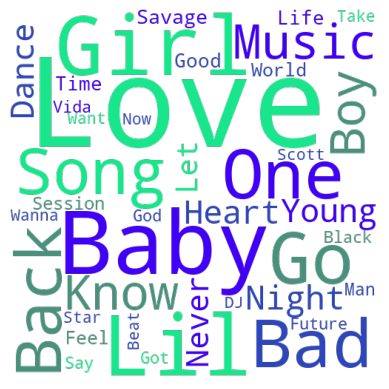

In [958]:
#SUMMARY PLOT: WORDCLOUD

#gather all text data from the titles of the songs
title_text = spotify_1['Track'].str.cat(sep= ' ')
title_text = title_text.replace('ý','')
title_text = title_text.replace(('ï'),'')
title_text = title_text.replace('1/2','') 
title_text = title_text.replace('½','')

additional_stopwords = STOPWORDS.union({'de', 'la', 'el', 'en', 'edit', 'Drake', 'cover', 'ya', 'un', 'mi', 'sped', 'da', 'feat','bzrp','p','x','E','T','l','n','u','j','b','tu','lo','si','se','m','y','o','s','remix','vol','version','que','te'}) 
# remove stop words in a different language and words that describe the song (such as version, feat., or remix)
#wordcloud already has some stopwords but the first version was very messy

#our color palette
color_palette = [ '#2d46b9ff', '#4100f5', '#4a917d', '#19e58cff']

#create custom color palette with random assignment
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(color_palette)



#generate wordcloud
wordcloud = WordCloud(background_color=None, mode='RGBA',width=500, height=500, max_words=40, collocations = False, stopwords = additional_stopwords).generate(title_text)
wordcloud.generate(title_text)

# color word cloud
colored_cloud = wordcloud.recolor(color_func=color_func)

plt.imshow(colored_cloud)
plt.axis("off")
# plt.savefig('transparent_wordcloud1.png', dpi=300, format='png', transparent=True, bbox_inches='tight', pad_inches=0)
# plt.close()
plt.show()

/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/1082473789.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(range(0, 7))
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/1082473789.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(r, size = 10)
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/1082473789.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 5))
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/1082473789.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(s, size = 10)


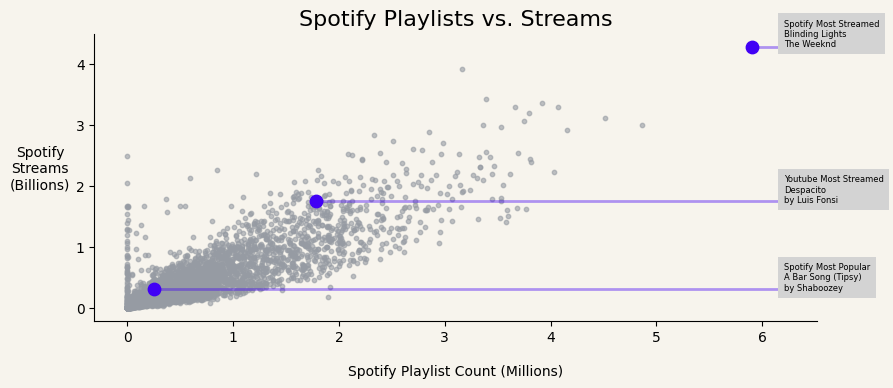

In [959]:
#AMELIA PLOT 1: EFFICIENCY OF PLAYLISTS

#normalize streaming a reach data for more appealing visuals
def normalize(spotify_1,col):
    x = (spotify_1[col] - spotify_1[col].min()) / \
                          (spotify_1[col].max() - spotify_1[col].min())
    return x
spotify_1['Normalized Spotify Playlist Reach'] = normalize(spotify_1, 'Spotify Playlist Reach')
spotify_1['Normalized Spotify Streams'] = normalize(spotify_1, 'Spotify Streams')
spotify_1['Normalized Total Streams'] = normalize(spotify_1, 'TotalStreams')
spotify_1['Normalized Spotify Playlist Count'] = normalize(spotify_1, 'Spotify Playlist Count')

#from notebook: make color scheme based on quantiles
#color_palette = [ '#2d46b9ff', '#4100f5', '#4a917d', '#19e58cff']
def conditions_color(df):
    if df['Spotify Popularity'] < 62:
        return '#0c52eb'
    elif (df['Spotify Popularity'] >= 62)& (df['Spotify Popularity'] < 67):
        return '#00f7ef'
    elif (df['Spotify Popularity'] >= 67)& (df['Spotify Popularity'] < 73):
        return '#2d46b9ff'
    else:
        return '#19e58cff'

def conditions_label(df):
    if df['Spotify Popularity'] < 62:
        return '0%-25% Spotify ranking'
    elif (df['Spotify Popularity'] >= 62)& (df['Spotify Popularity'] < 67):
        return '25%-50% Spotify ranking'
    elif (df['Spotify Popularity'] >= 67)& (df['Spotify Popularity'] < 73):
        return '50%-75% Spotify ranking'
    else:
        return '75%-100% Spotify ranking'

    
#define a new column storing the colors
spotify_1['Color'] = spotify_1.apply(conditions_color, axis=1)
spotify_1['Label'] = spotify_1.apply(conditions_label, axis=1)

#seperate data by population size
df_1 = spotify_1[spotify_1['Label']=='0%-25% Spotify ranking']
df_2 = spotify_1[spotify_1['Label']=='25%-50% Spotify ranking']
df_3 = spotify_1[spotify_1['Label']=='50%-75% Spotify ranking']
df_4 = spotify_1[spotify_1['Label']=='75%-100% Spotify ranking']

#pick out our interesting songs
dot_1 = spotify_1[spotify_1['Spotify Popularity']==spotify_1['Spotify Popularity'].max()]
dot_2 = spotify_1[spotify_1['Spotify Streams']==spotify_1['Spotify Streams'].max()]
dot_3 = spotify_1[spotify_1['TotalStreams']==spotify_1['TotalStreams'].max()]
dot_4 = spotify_1[spotify_1['YouTube Views'] == spotify_1['YouTube Views'].max()]

#start plot
fig, ax = plt.subplots(figsize=(9.32, 3.73))

#Scatter plot for each population size to generate legend
ax.scatter(df_1['Spotify Playlist Count'], df_1['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '0%-25% Spotify ranking')
ax.scatter(df_2['Spotify Playlist Count'], df_2['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '25%-50% Spotify ranking')
ax.scatter(df_3['Spotify Playlist Count'], df_3['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '50%-75% Spotify ranking')
ax.scatter(df_4['Spotify Playlist Count'], df_4['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '75%-100% Spotify ranking')
d1x = dot_1['Spotify Playlist Count'].iloc[0]
d1y = dot_1['Spotify Streams'].iloc[0]
d2x = dot_2['Spotify Playlist Count'].iloc[0]
d2y = dot_2['Spotify Streams'].iloc[0]
d3x = dot_3['Spotify Playlist Count'].iloc[0]
d3y = dot_3['Spotify Streams'].iloc[0]
d4x = dot_4['Spotify Playlist Count'].iloc[0]
d4y = dot_4['Spotify Streams'].iloc[0]



# Add title, xlabel and ylabel
ax.set_xlabel('Spotify Playlist Count (Millions)')
ax.set_ylabel('Spotify\nStreams\n(Billions)',rotation=0)
ax.set_title('Spotify Playlists vs. Streams', fontsize=16)

# set x label position to bottom left
ax.xaxis.set_label_coords(0.5, -0.15) 
# set y label position to top right
ax.yaxis.set_label_coords(-0.075, 0.45)

#mark the most notable songs
ax.scatter(dot_1['Spotify Playlist Count'], dot_1['Spotify Streams'], s=80, c='#4100f5')
ax.scatter(dot_2['Spotify Playlist Count'], dot_2['Spotify Streams'], s=80, c='#4100f5')
# ax.scatter(dot_3['Spotify Playlist Count'], dot_3['Spotify Streams'], s=50, c='#19e58cff')
ax.scatter(dot_4['Spotify Playlist Count'], dot_4['Spotify Streams'], s=80, c='#4100f5')

#offsets
x_offset = 30000
y_offset = 20000000

#clean up ticks
r = [None, '0', '1', "2", "3", "4", "5", "6", "7"]
ax.set_xticklabels(range(0, 7))
ax.set_xticklabels(r, size = 10)

s = [None, '0', '1', "2", "3", "4", '5']
ax.set_yticklabels(range(0, 5))
ax.set_yticklabels(s, size = 10)

#add text explaining notable songs
set1 = dict(facecolor='lightgrey', edgecolor='none')

ax.text(d2x+x_offset,d2y,'Spotify Most Streamed\nBlinding Lights\nThe Weeknd',fontsize=6,bbox=set1)
ax.hlines(y=d2y,xmin=d2x+x_offset,xmax=d2x,color='#4100f5',linewidth=2,alpha=0.4)

ax.text(d2x+x_offset,d1y-y_offset,'Spotify Most Popular\nA Bar Song (Tipsy)\nby Shaboozey',fontsize=6,bbox=set1)
ax.hlines(y=d1y,xmin=d2x+x_offset,xmax=d1x,color='#4100f5',linewidth=2,alpha=0.4)

ax.text(d2x+x_offset,d4y-y_offset,'Youtube Most Streamed\nDespacito\nby Luis Fonsi',fontsize=6,bbox=set1)
ax.hlines(y=d4y,xmin=d2x+x_offset,xmax=d4x,color='#4100f5',linewidth=2,alpha=0.4)

#change background color
ax.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')

#remove border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig("playlist_streams.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

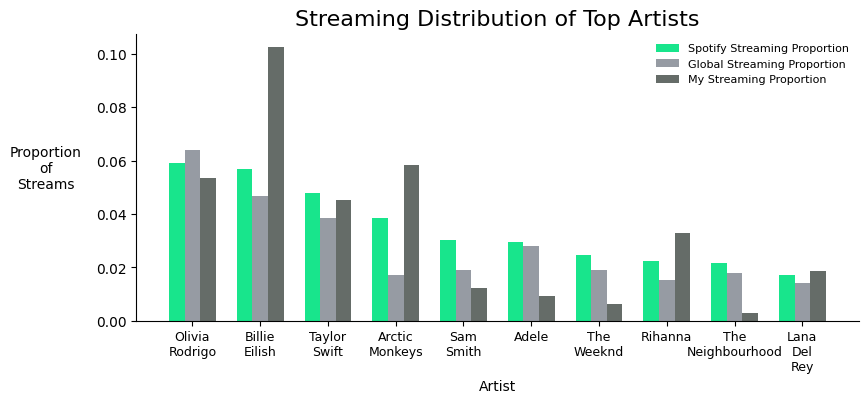

In [960]:
# AMELIA PLOT 2: ARTIST STREAMING SUCCESS


#including my own data: reading it in!
with open('/Users/amelia/Desktop/Bootcamp/MSDS593DataVis/final/Spotify Account Data/StreamingHistory_music_0.json') as f:
    data = json.load(f)
streaming0 = json_normalize(data)

#create datetime column for when i finished listening
streaming0['endTime'] = pd.to_datetime(streaming0['endTime'], format = '%Y-%m-%d %H:%M')

#convert milliseconds played into minutes
streaming0['MinPlayed'] = (streaming0['msPlayed']*0.001)/60
streaming0['StreamCount'] = 1

#make a new dataframe with only one entry for each song, 
# endtime = my first listen
# streamcount = number of time i listened
# minplayed = total streaming time
uniquedata = streaming0[['endTime','trackName','artistName', 'MinPlayed', 'StreamCount']]
uniquedata = uniquedata.groupby('trackName', as_index=False).agg({
    'artistName': 'first',
    'endTime': 'min',
    'MinPlayed': 'sum',
    'StreamCount': 'sum'
    
})

#sort the dataframe to rank by most minutes listened
uniquedata = uniquedata.sort_values(by = 'MinPlayed', ascending = False).reset_index(drop=True)
uniquedata = uniquedata[uniquedata['artistName']!='Cigarettes After Sex'].reset_index(drop=True)

#add a column to store the index as MY ranking
uniquedata['MyRanking'] = uniquedata.index.values
uniquedata = uniquedata.copy()

#check out overlap between my data and the most popular songs
overlapd1 = spotify_1[spotify_1['Track'].isin(uniquedata['trackName'])].copy()

#now lets merge the two by adding my own data
overlapd1 = overlapd1.merge(
    uniquedata[['trackName', 'MyRanking', 'MinPlayed', 'endTime', 'StreamCount']],
    left_on = 'Track', right_on = 'trackName',
    how = 'left'
)
overlapd1 = overlapd1[overlapd1['Artist'] != 'Imagine Dragons']
overlapd1.head()

#make column with difference in rank
overlapd1['Ranking Difference'] = overlapd1['All Time Rank'] - overlapd1['MyRanking']

#want to make a bar chart illustrating artists and their discovery on spotify using my data 
#as a case study, using proportions to make the data comparable

#grab variables of interest
artist_summary = overlapd1.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'TotalStreams': 'sum',
    'StreamCount': 'sum' }).reset_index()

#and calculate proportions with them
artist_summary['SpotifyProportion'] = artist_summary['Spotify Streams'] / artist_summary['Spotify Streams'].sum() # spotify out of total streams
artist_summary['MyProportion'] = artist_summary['StreamCount'] / artist_summary['StreamCount'].sum()
artist_summary['TotalProportion'] = artist_summary['TotalStreams'] / artist_summary['TotalStreams'].sum()

#grab top 10 artists
top10 = artist_summary.sort_values('SpotifyProportion', ascending=False).head(10)

#set up bar plot, use 25% of each slot
fig, ax = plt.subplots(figsize=(9.32, 3.73))
x = np.arange(len(top10))
w = 0.23

#establish each category and color
ax.bar(x-w, top10['SpotifyProportion'],  width=w, label= 'Spotify Streaming Proportion', color='#18e58c')
ax.bar(x,   top10['TotalProportion'],  width=w, label='Global Streaming Proportion', color='#969ba3')
ax.bar(x+w, top10['MyProportion'], width=w, label='My Streaming Proportion', color='#656C68')

# colors = ['#969ba3', '#4b917d', '#c3f0c8','#18e58c']
#set up x axis
xlabs= ['Olivia\nRodrigo', 'Billie\nEilish', 'Taylor\nSwift',
       'Arctic\nMonkeys', 'Sam\nSmith', 'Adele', 'The\nWeeknd', 'Rihanna',
       'The\nNeighbourhood', 'Lana\nDel\nRey']
ax.set_xticks(x)
ax.set_xticklabels(xlabs, fontsize=9,rotation=0)

#ylab and title
ax.set_title('Streaming Distribution of Top Artists', fontsize=16)
ax.set_ylabel('Proportion\nof\nStreams', rotation=0)
ax.set_xlabel('Artist', rotation=0)


# set y label position to top right
ax.yaxis.set_label_coords(-0.125, 0.45)

#show legend
ax.legend(fontsize=8, framealpha=0)

#hide border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("top_songs.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

